<a href="https://colab.research.google.com/github/mini-u/BasicDL/blob/main/%5B2023_10_18_%EC%98%A4%ED%9B%84_2_49_03%5D_0_%EC%9C%A0%EC%84%B1%EB%AF%BC_%EC%8B%A4%EC%8A%B5%EB%A6%AC%ED%8F%AC%ED%8A%B86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습리포트6



*   이름: 유성민
*   학과: 생명환경공학전공
*   학번: 2019110881

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras import Sequential
from keras.layers import Dense


### suv구매 예측

- 문제: 나이와 급여에 따른 SUV구매 여부 로지스틱 회귀로 예측하기

- 실행결과: 첫번째 실행에서 정확도 84.5%가 나옴. 은닉층을 추가한 뒤 두번째 실행에서 정확도가 91.2%로 높게 나옴.

In [ ]:
#데이터셋 정보
df=pd.read_csv('/content/SUV-dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#학습데이터 생성 x-> 나이, 급여 y-> SUV구매여부

x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

x0=x[y==0]
x1=x[y==1]
print(x0.shape, x1.shape)

(257, 2) (143, 2)


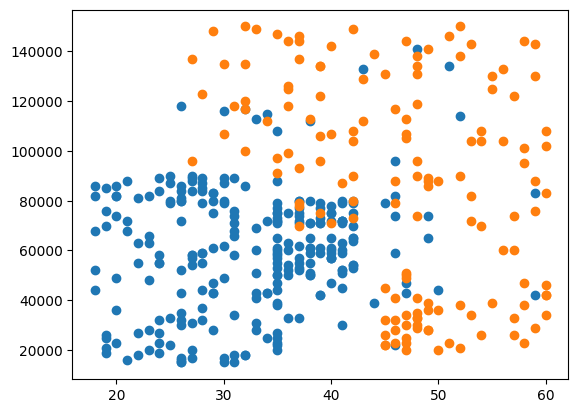

In [ ]:
#학습데이터 시각화

plt.scatter(x0[:,0], x0[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.show()

In [ ]:
#data strandardization

x_mean=np.mean(x, axis=0)
x_std=np.std(x, axis=0)
x_norm=(x-x_mean)/x_std

# (1) 출력층만 있는 모델

In [ ]:
#모델 정의

model=Sequential([
    Dense(1, input_shape=(2,), activation='sigmoid')
])

In [ ]:
#컴파일

sgd=keras.optimizers.SGD(0.1)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [ ]:
#모델 훈련

hist = model.fit(x_norm, y, epochs=100, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.4745 - binary_accuracy: 0.7875
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4415 - binary_accuracy: 0.8150
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4192 - binary_accuracy: 0.8250
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4039 - binary_accuracy: 0.8325
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3932 - binary_accuracy: 0.8375
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3852 - binary_accuracy: 0.8400
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3789 - binary_accuracy: 0.8425
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3742 - binary_accuracy: 0.8425
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3704 - binary_accuracy: 0.8425
Epoch 10/100
13/13 [==========================

In [ ]:
#모델 평가

model.evaluate(x_norm, y)

13/13 [==============================] - 0s 2ms/step - loss: 0.3464 - binary_accuracy: 0.8400


[0.34640082716941833, 0.8399999737739563]

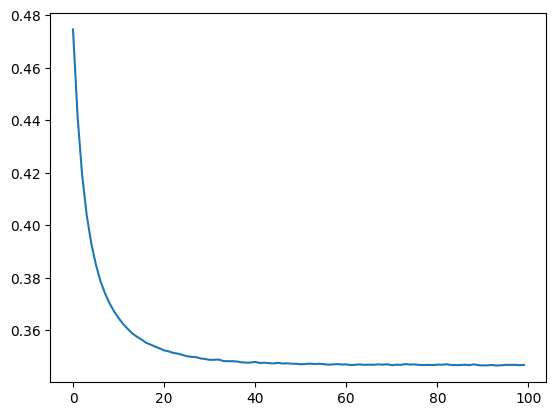

In [ ]:
#모델 검증

loss=hist.history['loss']
plt.plot(loss)
plt.show()

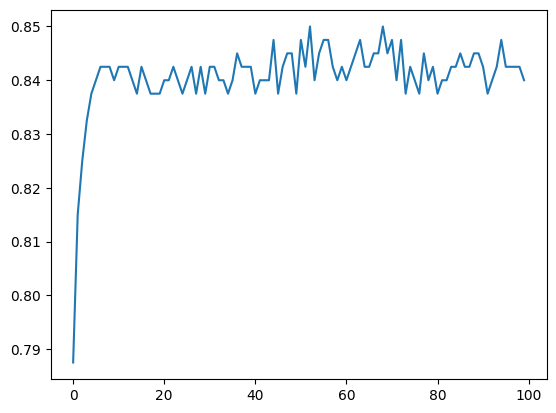

In [ ]:
acc=hist.history['binary_accuracy']
plt.plot(acc)
plt.show()

In [ ]:
#가중치 파라미터

w, b= model.get_weights()
print(w, b)

[[2.3963003]
 [1.2105433]] [-1.1531681]


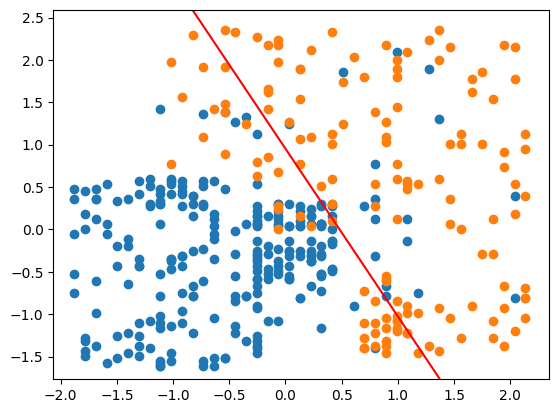

In [ ]:
#시각화

xmin=x_norm.min(axis=0)
xmax=x_norm.max(axis=0)
dx=[xmin[0]*1.1,xmax[0]*1.1,
    xmin[1]*1.1,xmax[1]*1.1]

x0=x_norm[y==0]
x1=x_norm[y==1]

z1=np.array([-2,2])
z2=-w[0]/w[1]*z1-b/w[1]

plt.scatter(x0[:,0], x0[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.plot(z1, z2, 'red')
plt.axis(dx)
plt.show()

# (2) 은닉층을 하나 추가한 모델

In [ ]:
#모델 재정의 - 3노드 은닉층 1개 추가

model2=Sequential([
    Dense(3, input_shape=(2,), activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
#모델컴파일

sgd=keras.optimizers.SGD(0.1)
model2.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [ ]:
#모델 훈련

hist2=model2.fit(x_norm, y, epochs=100, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.7071 - binary_accuracy: 0.6625
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5873 - binary_accuracy: 0.7175
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5028 - binary_accuracy: 0.7500
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4430 - binary_accuracy: 0.7925
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4039 - binary_accuracy: 0.8375
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3799 - binary_accuracy: 0.8550
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3637 - binary_accuracy: 0.8650
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3519 - binary_accuracy: 0.8675
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3448 - binary_accuracy: 0.8675
Epoch 10/100
13/13 [==========================

In [ ]:
#평가

model2.evaluate(x_norm, y)

13/13 [==============================] - 0s 4ms/step - loss: 0.2519 - binary_accuracy: 0.9125


[0.25187280774116516, 0.9125000238418579]

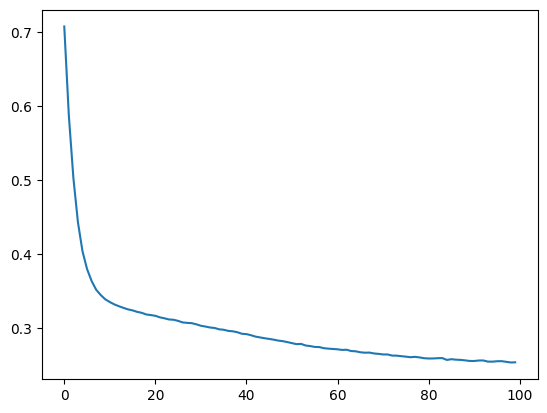

In [ ]:
#모델 검증

loss=hist2.history['loss']
plt.plot(loss)
plt.show()

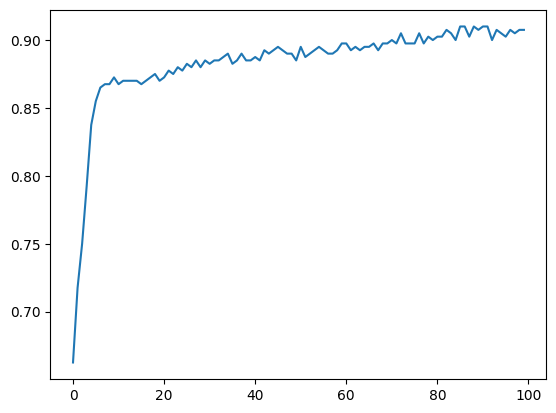

In [ ]:
acc=hist2.history['binary_accuracy']
plt.plot(acc)
plt.show()

In [ ]:
#시각화

xmin=x_norm.min(axis=0)*1.1
xmax=x_norm.max(axis=0)*1.1

dx=[xmin[0],xmax[0],xmin[1],xmax[1]]

x0p, x1p = np.meshgrid (np.arange(dx[0],dx[1],0.05), np.arange(dx[2], dx[3],0.05))

z=model2.predict(np.array([x0p.ravel(), x1p.ravel()]).T)
yp=(z>0.5).astype("int32")

245/245 [==============================] - 1s 2ms/step


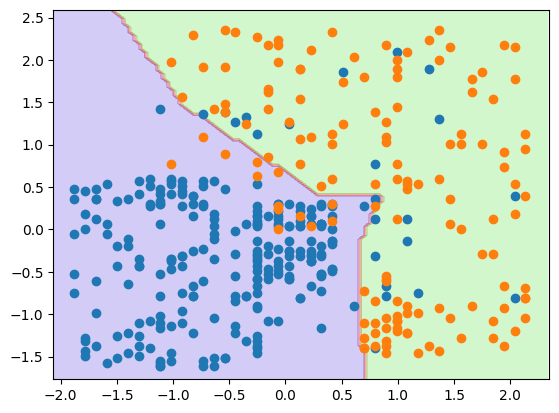

In [ ]:
#시각화

plt.contourf(x0p, x1p, yp.reshape(x0p.shape), alpha=0.2, cmap=plt.cm.brg)
plt.scatter(x0[:,0], x0[:,1])
plt.scatter(x1[:,0], x1[:,1])
plt.axis(dx)
plt.show()